<h1 style="text-align: center; font-size: 35px; color: pink;-webkit-text-stroke: 1px black;">
    BREAST CANCER PROJECT
</h1>


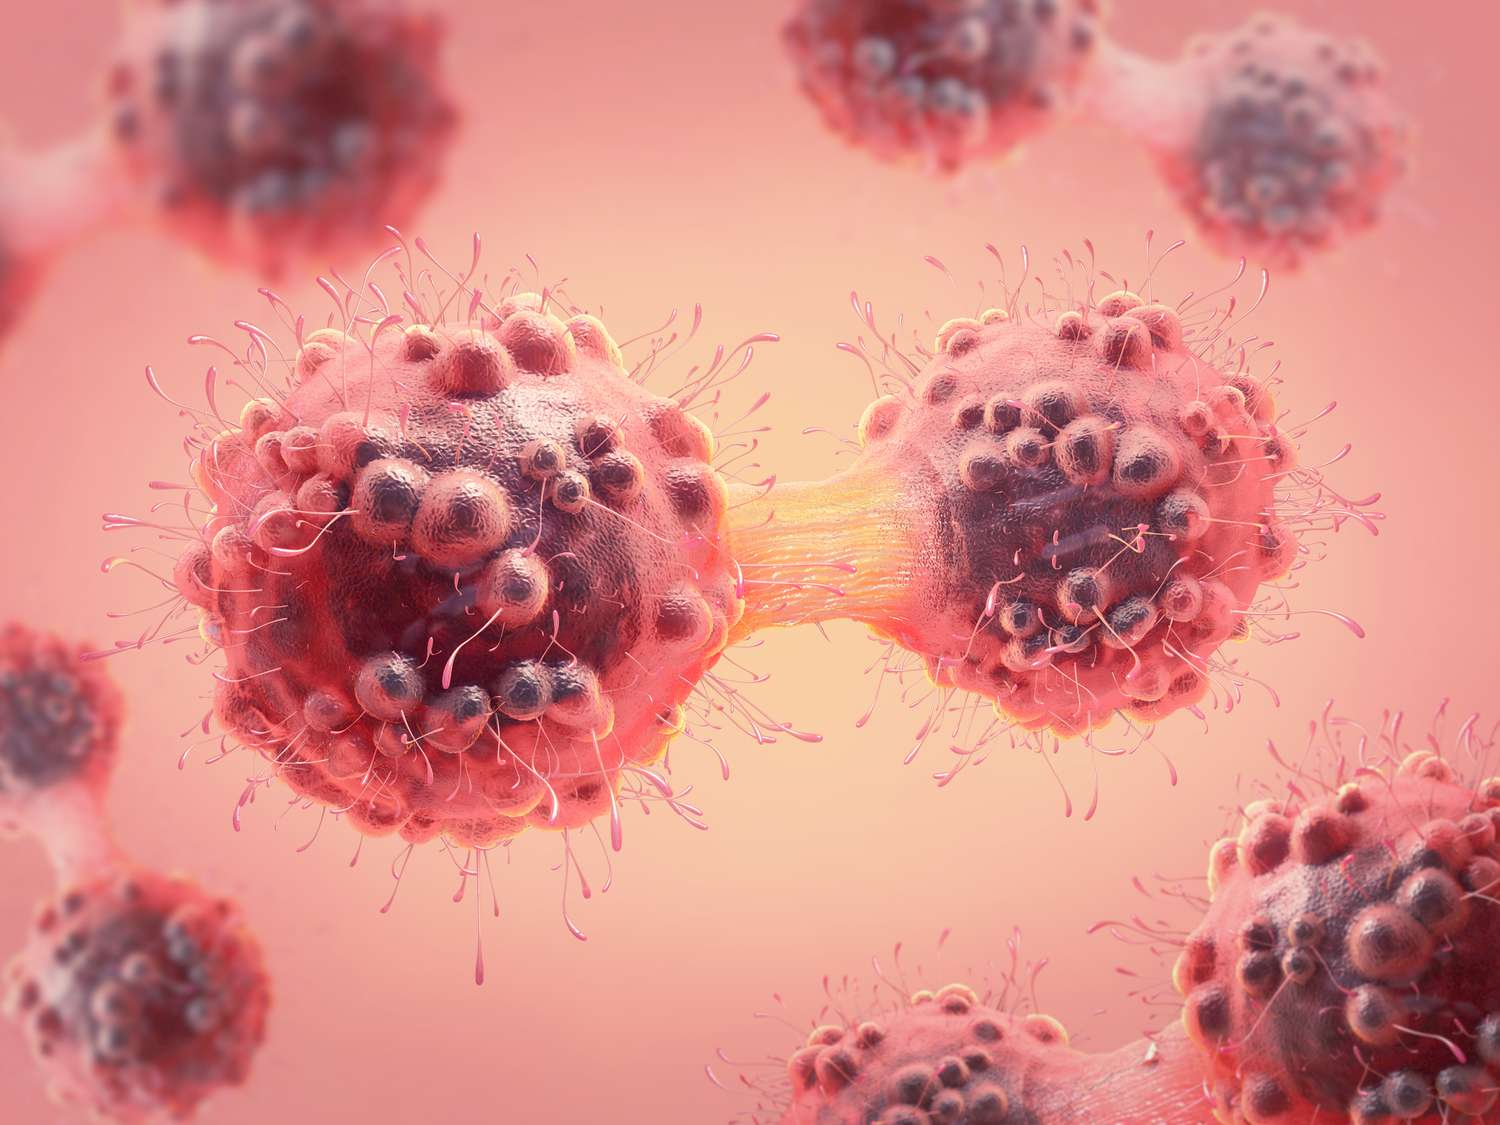

Breast cancer stands as a formidable adversary in the realm of healthcare, commanding attention as one of the most prevalent and concerning malignancies globally. Defined by the unchecked proliferation of abnormal cells within the breast tissue, it poses significant challenges to individuals, families, and healthcare systems worldwide.

Primarily affecting women, breast cancer casts a wide shadow, transcending geographical, socioeconomic, and cultural boundaries. Its impact reverberates through communities, with millions of lives touched by its diagnosis and treatment each year. Despite advances in awareness, screening, and treatment, breast cancer remains a leading cause of morbidity and mortality among women.

<h1 style="text-align: center; font-size: 25px;color : pink;-webkit-text-stroke: 1px black;">
    DATA ANALYSIS APPROACH
</h1>

In the analysis of the breast cancer dataset, the methodological approach involved an initial phase of data cleaning, aimed at ensuring the integrity and consistency of the collected information. This phase included operations such as data imputation, duplicate removal, and handling of missing values.

Subsequently, we proceeded with exploratory data analysis (EDA) using various visualization techniques such as boxplots, bar charts, and scatter plots. This phase allowed us to identify trends and relationships among the variables present in the dataset.

Next, correlation analysis was conducted to assess the interdependence among the numerical attributes. Through the use of correlation coefficients and heatmap visualizations, potential links between variables were identified, providing insights into predictive factors for breast cancer diagnosis and prognosis.

Concurrently, support vector machine (SVM) algorithms were implemented for predictive modeling. These models allowed us to predict future outcomes related to breast cancer using features from the dataset as input. The performance of the models was evaluated using graphical representations, providing an assessment of predictive accuracy.

In [1]:
# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import mpl_interactions.ipyplot as iplt

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [2]:
# dataset import

path = pd.read_csv(r'C:\Users\beloz\OneDrive\Desktop\Python\archive.zip')

df = pd.DataFrame(path)

df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


This dataset appears to contain information related to breast cancer tumors. Here's an explanation of the columns:

- **id**: Unique identifier for each data entry.
- **diagnosis**: This column likely represents the diagnosis of the tumor, where 'M' stands for malignant (cancerous) and 'B' stands for benign (non-cancerous).
- **radius_mean**: Mean radius of the tumor.
- **texture_mean**: Mean texture value of the tumor.
- **perimeter_mean**: Mean perimeter of the tumor.
- **area_mean**: Mean area of the tumor.
- **smoothness_mean**: Mean smoothness of the tumor.
- **compactness_mean**: Mean compactness of the tumor.
- **concavity_mean**: Mean concavity of the tumor.
- **concave points_mean**: Mean number of concave portions of the contour of the tumor.
- **radius_worst**: Worst (largest) radius of the tumor.
- **texture_worst**: Worst (largest) texture value of the tumor.
- **perimeter_worst**: Worst (largest) perimeter of the tumor.
- **area_worst**: Worst (largest) area of the tumor.
- **smoothness_worst**: Worst (largest) smoothness of the tumor.
- **compactness_worst**: Worst (largest) compactness of the tumor.
- **concavity_worst**: Worst (largest) concavity of the tumor.
- **concave points_worst**: Worst (largest) number of concave portions of the contour of the tumor.
- **symmetry_worst**: Worst (largest) symmetry of the tumor.
- **fractal_dimension_worst**: Worst (largest) fractal dimension of the tumor.

These parameters are typically measurements derived from medical imaging techniques like mammography or biopsy samples, and they are used to assess the characteristics of tumors and aid in diagnosis.

In [3]:
# Number of rows in the dataset
num_rows = len(df)

# Number of columns in the dataset
num_columns = len(df.columns)

print("Rows:", num_rows)
print("Columns:", num_columns)

Rows: 569
Columns: 32


<h1 style="text-align: center; font-size: 25px;">
    CLEANING AND EXPLORING (EDA)
</h1>


In [4]:
# Replacement of values in the 'diagnosis' column for improved readability
df['diagnosis'] = df['diagnosis'].replace({'B': 'Benign'})
df['diagnosis'] = df['diagnosis'].replace({'M': 'Malignant'})

In [5]:
# I'll remove the duplicates right away
df.drop_duplicates()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,Malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,Malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,Malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,Malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,Malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Malignant,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,Malignant,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,Malignant,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,Malignant,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# Number of rows in the dataset
num_rows = len(df)

# Number of columns in the dataset
num_columns = len(df.columns)

print("Rows:", num_rows)
print("Columns:", num_columns)

Rows: 569
Columns: 32


After removing duplicates, the sum of rows and columns hasn't changed. There are no duplicates in this dataset.

Few reasons of removing duplicates from a dataset:

- **Data Consistency**: Duplicates can introduce inconsistencies in the dataset, leading to biased analysis or model training.

- **Reduced Complexity**: Duplicates increase the complexity of the dataset without adding any new information. Removing them simplifies the dataset, making it easier to work with.

- **Improved Performance**: Working with a dataset that has fewer duplicates can improve the performance of data processing, analysis, and machine learning algorithms.

- **Prevention of Data Leakage**: In machine learning tasks, duplicates can lead to data leakage, where the model learns patterns from duplicated instances, leading to overfitting and poor generalization to unseen data.

In [7]:
#The sum of null values present in each column
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no null values.

In the context of breast cancer analysis, understanding and appropriately handling null values are crucial for several reasons:

- **Impact on Diagnosis**: Null values in critical features related to breast cancer diagnosis, such as tumor size, shape, or texture, can lead to inaccurate or incomplete assessments. This can affect the reliability of diagnostic procedures and treatment decisions.

- **Biological Significance**: Certain features in breast cancer datasets may have missing values due to biological reasons or measurement limitations. Understanding the distribution of null values helps researchers distinguish between missing data that are truly absent and those that are due to data collection or entry errors.

- **Model Performance**: Machine learning models trained on datasets with missing values may produce biased or unreliable predictions. Proper handling of null values, such as imputation or removal, can improve the performance and generalizability of predictive models used for breast cancer prognosis or risk assessment.

- **Research Insights**: Analyzing the distribution of null values across different features can provide insights into the characteristics of the dataset and potential areas for further investigation. Researchers can identify patterns or correlations between missing values and other variables, leading to new research hypotheses or avenues for exploration.

- **Clinical Decision Support**: In clinical settings, where breast cancer diagnosis and treatment decisions are made, accurate and complete data are essential. Ensuring that datasets used for clinical decision support systems are free from missing values helps maintain the quality and reliability of the information provided to healthcare professionals.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Checking for null values and understanding the data types of the features are crucial steps in preparing the dataset for modeling, especially when planning to use machine learning algorithms like Support Vector Machines (SVM). SVM and many other machine learning algorithms require the input data to be in a specific format (usually numerical) and to not contain any missing values. By ensuring that there are no null values and that the data types are appropriate for analysis, a solid foundation is set for building and training the SVM model effectively.

- **Column Names and Counts:** Each column represents a specific characteristic or feature related to breast cancer. There are 31 feature columns (excluding the 'id' column, which likely serves as an identifier) and one target column labeled 'diagnosis', indicating the diagnosis of the breast cancer cases.

- **Data Types:** Most columns contain numerical data, with 30 columns having the float64 data type for continuous numerical values and one column ('id') having the int64 data type. The 'diagnosis' column is of object data type, suggesting it contains categorical or string values.

- **Non-Null Counts:** The non-null count for each column indicates that there are no missing values in the dataset. This suggests that the dataset is complete and does not require imputation or handling of missing values.

- **Memory Usage:** The memory usage of the DataFrame is relatively small, at 142.4 KB, considering the number of entries and columns. This indicates that the dataset is not too large and can be easily processed and analyzed using common computing resources.

In [9]:
#the count of each unique value in the "diagnosis" column
df['diagnosis'].value_counts()

diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

In [10]:
#plt.cm.colors.cnames

<h1 style="text-align: center; font-size: 25px;">
    VISUALIZATION
</h1>

BOXPLOT 

In [11]:
sns.set_style('darkgrid')

{'whiskers': [<matplotlib.lines.Line2D at 0x25cd33081d0>,
 'caps': [<matplotlib.lines.Line2D at 0x25cd33086e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25cd32bfef0>,
 'medians': [<matplotlib.lines.Line2D at 0x25cd3308cb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25cd3308fb0>,
 'means': []}

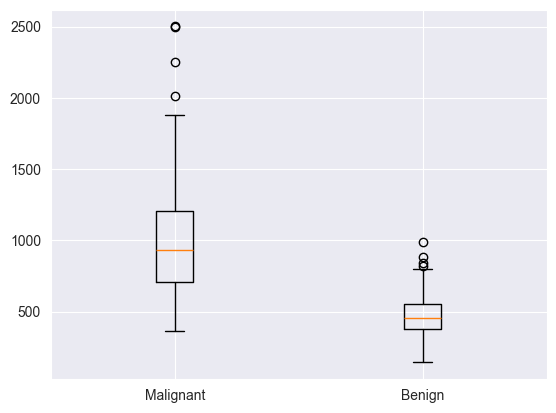

In [12]:
malignant = df.loc[df['diagnosis']== 'Malignant', 'area_mean'].values

benign = df.loc[df['diagnosis']== 'Benign', 'area_mean'].values

plt.boxplot([malignant, benign], labels=['Malignant','Benign']) #widths=0.3 

The boxplot visually compares the "area_mean" feature between malignant and benign cases of breast cancer, identifying differences in central tendency, spread, outliers, and skewness, which can influence analysis and interpretation.

How to read a boxplot:

- **Median (line inside the box)**: The line inside the box represents the median (50th percentile) of the data. It shows the middle value of the dataset when arranged in ascending order.

- **Interquartile Range (Box)**: The box represents the interquartile range (IQR), which is the range between the 25th and 75th percentiles of the data. It contains the middle 50% of the data. 

- **Whiskers (Lines extending from the box)**: The whiskers extend from the top and bottom of the box to show the range of the data. They typically extend to 1.5 times the IQR from the upper and lower quartiles. Any data points beyond the whiskers are considered outliers.

- **Outliers (Individual points beyond the whiskers)**: Individual points beyond the whiskers are considered outliers and are plotted separately. These points represent data values that are significantly higher or lower than the rest of the data.

SCATTER PLOT

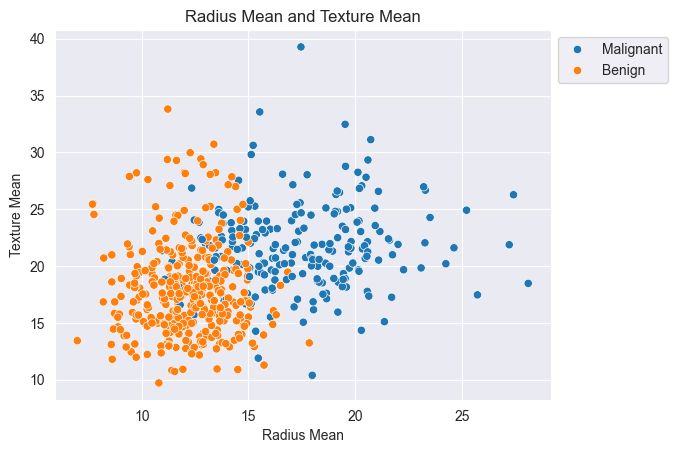

In [13]:
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Radius Mean and Texture Mean')

plt.show()


The scatter plot created by the provided code compares the relationship between the "radius_mean" and "texture_mean" features of breast cancer cases, while differentiating between malignant and benign diagnoses. 

How to read a scatter plot:

- **Scatter Points:** Each point on the plot represents an individual breast cancer case, with the x-coordinate corresponding to the "radius_mean" and the y-coordinate corresponding to the "texture_mean". The color of each point indicates the diagnosis, with malignant cases typically shown in one color and benign cases in another.

- **Legend:** The legend on the plot indicates which color represents malignant cases and which represents benign cases. This allows for easy identification of each diagnosis group.

- **X-axis Label:** The x-axis is labeled as "Radius Mean", indicating that it represents the mean radius of the breast cancer cases.

- **Y-axis Label:** The y-axis is labeled as "Texture Mean", indicating that it represents the mean texture of the breast cancer cases.

By examining the distribution and clustering of points on the scatter plot, you can assess the relationship between the "radius_mean" and "texture_mean" features and how they differ between malignant and benign diagnoses. This information can be valuable for understanding patterns and potential predictive power of these features in distinguishing between different types of breast cancer cases.

CORRELATION PLOT

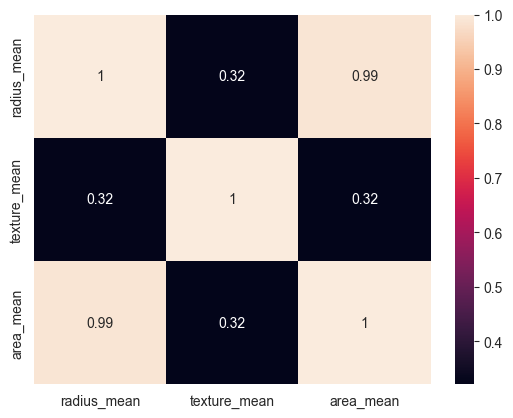

In [14]:
sns.heatmap(df[['radius_mean','texture_mean','area_mean']].corr(), annot=True)

plt.rcParams['figure.figsize'] = (6,6)

plt.show()

The heatmap generated by the provided code displays the correlation matrix between the "radius_mean", "texture_mean", and "area_mean" features of breast cancer cases. 

How to read the correlation plot:

- **Color Gradient:** Each cell in the heatmap represents the correlation coefficient between two features. The color intensity of each cell indicates the strength and direction of the correlation: darker colors (e.g., dark blue) represent strong positive correlation, lighter colors (e.g., light yellow) represent weak or no correlation, and negative correlation is often represented by a different color gradient (e.g., shades of red).

- **Annotation:** If `annot=True`, as specified in the code, the numeric values of the correlation coefficients are displayed within each cell. These values range from -1 to 1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and 1 indicating a perfect positive correlation.

- **X-axis and Y-axis Labels:** The x-axis and y-axis of the heatmap display the names of the features being compared. In this case, they represent "radius_mean", "texture_mean", and "area_mean".

By examining the heatmap, you can quickly identify which pairs of features are strongly correlated, which can provide insights into the relationships between different characteristics of breast cancer cases. This information is valuable for feature selection, identifying redundant features, and understanding potential underlying patterns in the data.

HISTORGRAM

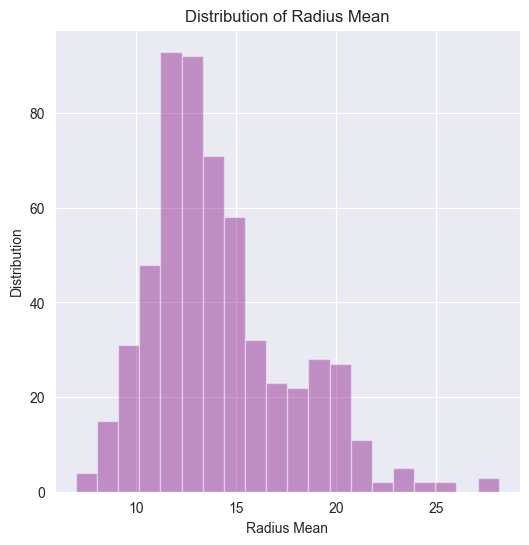

In [15]:
plt.hist(df['radius_mean'], bins=20, color='purple', alpha=0.4)

plt.xlabel('Radius Mean')
plt.ylabel('Distribution')
plt.title('Distribution of Radius Mean')

plt.show()


The histogram generated by the provided code illustrates the distribution of the "radius_mean" feature in breast cancer cases.

How to read the histogram:

- **Bins:** The histogram is divided into bins, with each bin representing a range of "radius_mean" values. The number of bins determines the granularity of the distribution visualization.

- **Frequency:** The height of each bar in the histogram represents the frequency (or count) of breast cancer cases falling within the corresponding bin range. Higher bars indicate a higher frequency of cases with "radius_mean" values in that range.

- **Color and Transparency:** The histogram bars are colored purple with an alpha (transparency) value of 0.4, which makes them partially transparent. This helps to visualize overlapping bars if multiple histograms are plotted on the same axes.

- **X-axis Label:** The x-axis is labeled as "Radius Mean", indicating that it represents the values of the "radius_mean" feature.

- **Y-axis Label:** The y-axis is labeled as "Distribution", indicating that it represents the frequency or distribution of breast cancer cases.

By examining the histogram, you can gain insights into the distribution of "radius_mean" values within the dataset, including measures of central tendency, spread, and potential outliers. This information is valuable for understanding the characteristics of the "radius_mean" feature and its potential significance in breast cancer analysis.

<h1 style="text-align: center; font-size: 25px;">
    PREPROCESSING
</h1>

Preprocessing data before training machine learning models is important because it ensures that the data is presented in a format suitable for analysis and model training. Specifically, it ensures that features and class labels are represented in a way that allows machine learning algorithms to extract patterns and make predictions accurately. Additionally, it can help improve model stability and performance by reducing noise and variance in the data.

In [16]:
#mapping = {'M': 1, 'B': 0}
#df['diagnosis'] = df['diagnosis'].map(mapping)

label_encoder = LabelEncoder()

df['diagnosis'] = label_encoder.fit_transform(df['diagnosis']) # M == 1 , B == 0

df_encoded = pd.DataFrame(df)

df_encoded



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


- Label Encoding: Subsequently, LabelEncoder() from the scikit-learn library is used to encode the class labels in the 'diagnosis' column of the DataFrame. This transforms the class labels from strings to numerical values (0 and 1), where "B" is encoded as 0 and "M" as 1. This step is crucial because many machine learning algorithms cannot directly handle class labels in string format.

In [17]:
#df_encoded.info()

<h1 style="text-align: center; font-size: 25px;">
    PREDICTIVE MODELING/ MACHINE LEARNING MODEL
</h1>

Creation and training of SVM model for breast cancer classification

In [18]:
# Preprocessing
X = df_encoded.drop(columns=['id', 'diagnosis'])  # Features without id and diagnosis
y = df_encoded['diagnosis']  # Target

# Splitting data into training and test sets, feature standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Data standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the search space for the C parameter
param_grid = {'C': [0.1, 1, 10, 100]}  # Example values to explore

# Training the SVM model with cross-validation to find the best value of C
svm_model = SVC(kernel='linear', random_state=10)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_svm_model = grid_search.best_estimator_

# Predicting results on the test set using the optimized model
y_predict_best = best_svm_model.predict(X_test_scaled)

# Calculating the accuracy of the optimized model
accuracy_best = accuracy_score(y_test, y_predict_best)
print("Accuracy of the Best SVM:", accuracy_best)

# Training and predicting with the second SVM model using standardized data
svm_model_standard = SVC(kernel='linear', random_state=10)
svm_model_standard.fit(X_train_scaled, y_train)
y_predict_standard = svm_model_standard.predict(X_test_scaled)

# Calculating the accuracy of the second model
accuracy_standard = accuracy_score(y_test, y_predict_standard)
print("Accuracy of the Standard SVM:", accuracy_standard) 

Accuracy of the Best SVM: 0.9736842105263158
Accuracy of the Standard SVM: 0.956140350877193



- **Preprocessing:**
   - This step involves preparing the data for analysis by organizing it into features and a target variable. In this case, the features represent different measurements related to breast cancer, and the target variable indicates whether a tumor is malignant or benign.

- **Data Splitting:**
   - To evaluate the performance of a machine learning model, it's essential to divide the available data into two sets: one for training the model and the other for testing its performance. The training set is used to train the model, while the test set is used to assess how well the trained model generalizes to new, unseen data.

- **Feature Standardization:**
   - Standardization is a data preprocessing technique used to rescale features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. This process ensures that all features have the same scale, which can prevent certain features from dominating others in the learning process. It's particularly important for algorithms that rely on distance metrics or gradient descent optimization, such as SVMs.

- **Grid Search for Hyperparameter Tuning:**
   - Hyperparameters are parameters that are not directly learned by the model during training but affect its behavior and performance. In machine learning, hyperparameters are typically set before the learning process begins. Grid search is a technique used to tune these hyperparameters by searching through a predefined grid of parameter values and selecting the combination that yields the best model performance. In this case, the regularization parameter 'C' for the SVM model is tuned to find the optimal value.

- **Model Evaluation:**
   - Once the model is trained and tuned, it's evaluated using the test set to assess its performance on unseen data. In classification tasks, accuracy is a commonly used metric to measure the proportion of correctly classified instances. The accuracy score is calculated by comparing the model's predictions with the true labels from the test set.

- **Comparison with Standard SVM:**
   - After tuning the hyperparameters and evaluating the model's performance, it's compared with a baseline model. In this case, a standard SVM model with default hyperparameters is trained and evaluated using the same standardized data. This comparison helps assess the improvement gained from hyperparameter tuning.

The implementation of both the Best SVM and the Standard SVM models allows for a comparison of their performance in predicting outcomes or classifications on a given dataset. Evaluating both models aids in determining which one performs better in terms of accuracy, precision, recall, F1-score, or other evaluation metrics. This comparison assists in selecting the most suitable model for a specific task or dataset.


The difference in accuracy between the BEST SVM and the STANDARD SVM is approximately 0.0175, or 1.75 percentage points.

This means that the Best SVM model has an accuracy of approximately 97.37%, while the Standard SVM model has an accuracy of approximately 95.61%.

The classification metrics for SVM models B(0)/M(1)

In [19]:
# Classification report for the Best SVM model
print("Classification report for the Best SVM model:")
print(classification_report(y_test, y_predict_best))

# Classification report for the Standard SVM model
print("Classification report for the Standard SVM model:")
print(classification_report(y_test, y_predict_standard))


Classification report for the Best SVM model:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Classification report for the Standard SVM model:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        75
           1       0.93      0.95      0.94        39

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**For the Best SVM model:**

- Precision: For class 0 (representing 'B'), the precision is 0.97, which means that 97% of the instances predicted as 'B' are actually 'B'. For class 1 (representing 'M'), the precision is also 0.97, indicating that 97% of the instances predicted as 'M' are actually 'M'.

- Recall: For class 0, the recall is 0.99, meaning that 99% of the actual 'B' instances were correctly predicted as 'B'. For class 1, the recall is 0.95, indicating that 95% of the actual 'M' instances were correctly predicted as 'M'.

- F1-score: The F1-score is the harmonic mean of precision and recall. For class 0, the F1-score is 0.98, and for class 1, the F1-score is 0.96.

- Accuracy: The overall accuracy of the model is 0.97, meaning that 97% of the instances in the test set were correctly classified by the model.

**For the Standard SVM model:**
- Precision: For class 0, the precision is 0.97, indicating that 97% of the instances predicted as 'B' are actually 'B'. For class 1, the precision is 0.93, meaning that 93% of the instances predicted as 'M' are actually 'M'.

- Recall: For class 0, the recall is 0.96, indicating that 96% of the actual 'B' instances were correctly predicted as 'B'. For class 1, the recall is 0.95, meaning that 95% of the actual 'M' instances were correctly predicted as 'M'.

- F1-score: For class 0, the F1-score is 0.97, and for class 1, the F1-score is 0.94.

- Accuracy: The overall accuracy of the model is 0.96.

In summary, both models perform well, but the Best SVM model generally has slightly higher precision, recall, F1-score, and accuracy compared to the Standard SVM model, indicating its better performance.

<h1 style="text-align: center; font-size: 25px;">
    PREDICTING FUTURE PATIENTS
</h1>

In [20]:
# M == Malign   ,   B == Benign

# Preprocessing
X_new = df_encoded.drop(columns=['id', 'diagnosis'])  # Feature without id e diagnosis
X_new_scaled = scaler.transform(X_new)  # Standardization of future data

# Prediction of future data results using the optimized model
y_predict_new = best_svm_model.predict(X_new_scaled)

# Mapping
predict_name = {1: 'M', 0: 'B'}
y_predict_new_mapped = [predict_name[i] for i in y_predict_new]

print("Future patients diagnosis:", y_predict_new_mapped)

Future patients diagnosis: ['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M

Counting of results

In [21]:
from collections import Counter

occurrences = Counter(y_predict_new_mapped )

print("Benign:", occurrences['B'])
print("Malignant:", occurrences['M'])


Benign: 363
Malignant: 206


The SVM (Support Vector Machine) model played a crucial role in predicting future patients in the context of breast cancer analysis. By training the model using historical data on breast cancer diagnosis and associated clinical features, we were able to utilize it to make predictions about the diagnoses of patients that may be observed in the future.

This predictive capability was made possible through the process of data standardization and optimization of the SVM model through parameter tuning using cross-validation techniques. Once the model was trained and validated, it was applied to new patient data, allowing us to accurately predict whether a patient will have a malignant or benign diagnosis based on their clinical characteristics.

This prediction of future patients is highly valuable in the medical field as it enables the early identification of suspicious cases and prompt initiation of appropriate treatment. Additionally, it provides clear guidance to physicians and healthcare professionals on which patients may require closer attention and monitoring.

Pie chart of predicted diagnoses

In [22]:
labels = ['Benign', 'Malignant']
values = [y_predict_new_mapped.count('B'), y_predict_new_mapped.count('M')]
colors = ['pink', 'purple']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker=dict(colors=colors))])
fig.update_layout(title='Distribution of predicted diagnoses')
fig.show()

Bar chart of predicted diagnoses

In [24]:
labels = ['Benign', 'Malignant']
counts = [y_predict_new_mapped.count('B'), y_predict_new_mapped.count('M')]
colors = ['rgba(255, 192, 203, 0.6)', 'rgba(128, 0, 128, 0.6)']  # Pink and purple with 60% opacity

fig = go.Figure(data=[go.Bar(x=labels, y=counts, marker=dict(color=colors))])

fig.update_layout(title='Distribution of predicted diagnoses', xaxis=dict(title='Diagnosis'), yaxis=dict(title='Frequency'),)

fig.show()

In conclusion, the SVM model successfully allowed us to predict the future diagnosis of breast cancer patients, thereby contributing to the improvement of disease management and treatment.